**Inserting Required Modules**

In [27]:
from google.colab import files
import zipfile
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import IPython.display as ipd
import shutil
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

**Insert Dataset from kaggle**

To upload a dataset from Kaggle to Google Colab, a kaggle.json file is first downloaded from Kaggle. This file is then used to upload the dataset to Google Colab.

In [28]:
files.upload()  # Upload the kaggle.json file
# Create the .kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)

# Move kaggle.json into the .kaggle directory
!mv kaggle.json /root/.kaggle/

# Set permissions to access the API key
!chmod 600 /root/.kaggle/kaggle.json
#download dataset
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio
with zipfile.ZipFile('ravdess-emotional-speech-audio.zip', 'r') as zip_ref:
    zip_ref.extractall('ravdess_data')  # Extract to a folder named 'ravdess_data'

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
ravdess-emotional-speech-audio.zip: Skipping, found more recently modified local copy (use --force to force download)


In [29]:
ravdess = "ravdess_data/audio_speech_actors_01-24"
ravdess_directory_list = os.listdir(ravdess)
ravdess_directory_list.sort()
print(ravdess_directory_list)
print(len(ravdess_directory_list))

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']
24


# **Segmentation and Silent File Removal**

install and insert required packages

In [30]:
!pip install pydub
!apt-get install ffmpeg
!apt-get install ffmpeg -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [31]:
# Insert required Modules
from pydub import AudioSegment
from pydub.silence import detect_nonsilent

In [32]:
# Base directory containing all audio files
base_dir = "ravdess_data/audio_speech_actors_01-24"

# Output directory to save processed segments
output_dir = "RAVDESS_Segmented"
os.makedirs(output_dir, exist_ok=True)

# Segment length in milliseconds
segment_length = 270

# Counters for segments
total_saved_segments = 0  # Count of saved (non-silent) segments
total_skipped_segments = 0  # Count of skipped (silent) segments

# Iterate through all files and subdirectories in the base directory
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".wav"):  # Process only WAV files
            file_path = os.path.join(root, file)

            # Load the audio file
            audio = AudioSegment.from_wav(file_path)

            # Split the audio into chunks
            for i, start in enumerate(range(0, len(audio), segment_length)):
                end = start + segment_length
                segment = audio[start:end]

                # Detect non-silent parts in the segment
                non_silent_parts = detect_nonsilent(segment, min_silence_len=100, silence_thresh=-50)

                # Save non-silent segment
                if non_silent_parts and len(segment) >= 250:
                    total_saved_segments += 1  # Increment saved segment counter

                    # Create a unique output path for each file and segment
                    file_name = os.path.splitext(file)[0]
                    segment_name = f"{file_name}_segment_{i + 1}.wav"  # Customized segment name

                    output_path = os.path.join(output_dir, segment_name)
                    segment.export(output_path, format="wav")
                    print(f"Saved: {output_path}")
                else:
                    total_skipped_segments += 1  # Increment skipped segment counter

# Summary of processing
print("\nProcessing complete.")
print(f"Total segments processed: {total_saved_segments + total_skipped_segments}")
print(f"Total saved (non-silent) segments: {total_saved_segments}")
print(f"Total skipped (silent) segments: {total_skipped_segments}")

Streaming output truncated to the last 5000 lines.
Saved: RAVDESS_Segmented/03-01-02-01-01-01-13_segment_5.wav
Saved: RAVDESS_Segmented/03-01-02-01-01-01-13_segment_6.wav
Saved: RAVDESS_Segmented/03-01-02-01-01-01-13_segment_7.wav
Saved: RAVDESS_Segmented/03-01-02-01-01-01-13_segment_8.wav
Saved: RAVDESS_Segmented/03-01-02-01-01-01-13_segment_9.wav
Saved: RAVDESS_Segmented/03-01-04-01-01-02-13_segment_5.wav
Saved: RAVDESS_Segmented/03-01-04-01-01-02-13_segment_6.wav
Saved: RAVDESS_Segmented/03-01-04-01-01-02-13_segment_7.wav
Saved: RAVDESS_Segmented/03-01-04-01-01-02-13_segment_8.wav
Saved: RAVDESS_Segmented/03-01-04-01-01-02-13_segment_9.wav
Saved: RAVDESS_Segmented/03-01-04-02-02-01-13_segment_4.wav
Saved: RAVDESS_Segmented/03-01-04-02-02-01-13_segment_5.wav
Saved: RAVDESS_Segmented/03-01-04-02-02-01-13_segment_6.wav
Saved: RAVDESS_Segmented/03-01-04-02-02-01-13_segment_7.wav
Saved: RAVDESS_Segmented/03-01-04-02-02-01-13_segment_8.wav
Saved: RAVDESS_Segmented/03-01-04-02-02-01-13_seg

In [33]:
# Mapping dictionaries for decoding the file naming conventions
modality_map ={'01':'full-AV', '02':'video-only', '03':'audio-only'}
vocal_channel_map ={'01':'speech', '02':'song'}
emotion_map = {
    '01': 'Neutral',
    '02': 'Calm',
    '03': 'Happy',
    '04': 'Sad',
    '05': 'Angry',
    '06': 'Fearful',
    '07': 'Disgust',
    '08': 'Surprise'
}
emotional_intensity_map ={'01':'normal', '02':'strong'}
statement_map = {'01':'Kids', '02':'Dogs'}
repetition_map = {'01':'1st repetition', '02':'2nd repetition'}
# Initialize lists to store extracted information for each file
file_paths = []
modalities  = []
channel = []
emotions = []
intensity = []
statement = []
repitation_number = []
actor_ids = []
segment_ids = []

# Walk through the output directory to process each file to extract info
for root, dirs, file_names in os.walk(output_dir):
  for file_name in file_names:
    file_path = os.path.join(root, file_name)

    modality_code = file_name.split('-')[0]
    modality =  modality_map.get(modality_code, 'Unknown')

    channel_code = file_name.split('-')[1]
    channel_no = vocal_channel_map.get(channel_code, 'Unknown')

    emotion_code = file_name.split('-')[2]
    emotion = emotion_map.get(emotion_code, 'Unknown')

    emotional_intensity_code = file_name.split('-')[3]
    emotional_intensity = emotional_intensity_map.get(emotional_intensity_code, 'Unknown')

    statement_code = file_name.split('-')[3]
    statement_no = statement_map.get(statement_code, 'Unknown')

    repetition_code = file_name.split('-')[3]
    repitation = repetition_map.get(repetition_code, 'Unknown')

    actor_id = file_name.split('-')[-1].split('_')[0].split('.')[0]
    segment_id = file_name.split('-')[-1].split('_')[-1].split('.')[0]

    # Append the extracted data to corresponding lists
    file_paths.append(file_path)
    emotions.append(emotion)
    actor_ids.append(actor_id)
    modalities.append(modality)
    channel.append(channel_no)
    intensity.append(emotional_intensity)
    statement.append(statement_no)
    repitation_number.append(repitation)
    segment_ids.append(segment_id)
print('Dataset is loaded.')


Dataset is loaded.


**  Create the DataFrame**

In [34]:
df = pd.DataFrame({
    'File_path': file_paths,
    'Emotion': emotions,
    'Actor_id': actor_ids,
    'Statement': statement,
    'Repitation':repitation_number,
    'Channel': channel,
    'Modality': modalities,
    'Intensity': intensity,
    'Segment_number': segment_ids,

})

# Display the first few rows of the DataFrame
pd.set_option('display.max_colwidth', 1)
print(df.head())

                                               File_path  Emotion Actor_id  \
0  RAVDESS_Segmented/03-01-07-01-02-01-04_segment_7.wav   Disgust  04        
1  RAVDESS_Segmented/03-01-02-01-01-01-12_segment_7.wav   Calm     12        
2  RAVDESS_Segmented/03-01-05-01-01-02-17_segment_10.wav  Angry    17        
3  RAVDESS_Segmented/03-01-04-02-01-01-22_segment_9.wav   Sad      22        
4  RAVDESS_Segmented/03-01-04-01-01-01-21_segment_12.wav  Sad      21        

  Statement      Repitation Channel    Modality Intensity Segment_number  
0  Kids      1st repetition  speech  audio-only  normal    7              
1  Kids      1st repetition  speech  audio-only  normal    7              
2  Kids      1st repetition  speech  audio-only  normal    10             
3  Dogs      2nd repetition  speech  audio-only  strong    9              
4  Kids      1st repetition  speech  audio-only  normal    12             


In [35]:
df['Emotion'].value_counts()

,count
Emotion,
Angry,1507
Disgust,1435
Happy,1340
Fearful,1325
Surprise,1218
Sad,1186
Calm,1025
Neutral,544


<Axes: xlabel='count', ylabel='Emotion'>

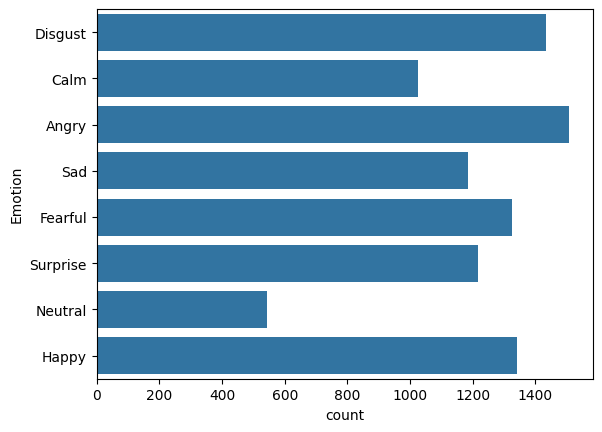

In [36]:
sns.countplot(df['Emotion'])

**Balance the Datafarme**

In [37]:
from sklearn.utils import resample

# Separate majority and minority classes
dfs = [df[df.Emotion == emotion] for emotion in df['Emotion'].unique()]

# Resample minority classes to match the largest class
max_count = max(len(d) for d in dfs)
balanced_dfs = [resample(d, replace=True, n_samples=max_count, random_state=42) if len(d) < max_count else d for d in dfs]

# Combine all classes
balanced_df = pd.concat(balanced_dfs)

print(balanced_df['Emotion'].value_counts())

Emotion
Disgust     1507
Calm        1507
Angry       1507
Sad         1507
Fearful     1507
Surprise    1507
Neutral     1507
Happy       1507
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Emotion'>

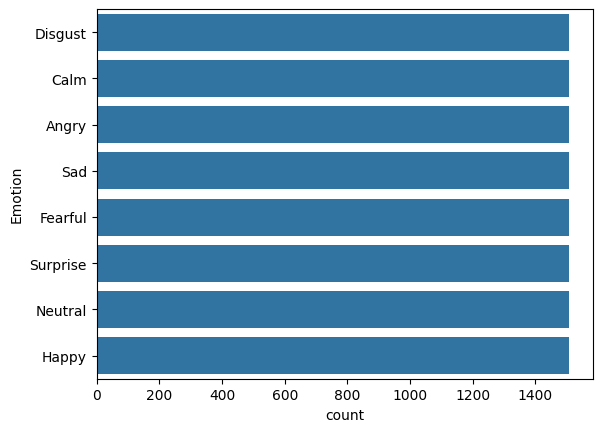

In [38]:
sns.countplot(balanced_df['Emotion'])

In [39]:
# Save DataFrame to CSV for further use
balanced_df.to_csv('ravdess_segments_with_emotions.csv', index=False)

**MFCC extraction and Normalization**

In [40]:
# Initialize lists to store data
mfcc_features = []
file_paths = []

# Load the DataFrame
df = pd.read_csv('ravdess_segments_with_emotions.csv')

# Function to extract MFCC features
def extract_mfcc(file_path, n_mfcc=40, sr=22050):
    # Load the audio file using librosa
    y, sr = librosa.load(file_path, sr=sr)

    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Transpose MFCC to make it a 1D vector (each segment has multiple frames)
    mfcc = np.mean(mfcc, axis=1)  # Mean across time frames

    return mfcc

# Extract MFCC features for each file
for index, row in df.iterrows():
    file_path = row['File_path']

    # Extract MFCC features for the file
    mfcc = extract_mfcc(file_path)

    # Append the features and file path to the lists
    mfcc_features.append(mfcc)
    file_paths.append(file_path)

# Convert the list of MFCC features to a numpy array
mfcc_array = np.array(mfcc_features)

# Normalize the MFCC features using Z-score normalization
scaler = StandardScaler()
mfcc_normalized = scaler.fit_transform(mfcc_array)

# Add the normalized MFCC features to the DataFrame
df_mfcc = pd.DataFrame(mfcc_normalized, columns=[f'MFCC_{i+1}' for i in range(mfcc_normalized.shape[1])])

# Concatenate the original DataFrame with the MFCC features DataFrame
df_combined = pd.concat([df, df_mfcc], axis=1)

# Display the DataFrame with MFCC features
print(df_combined.head())

# save the combined DataFrame to a CSV file
df_combined.to_csv('ravdess_mfcc_features.csv', index=False)

                                               File_path  Emotion  Actor_id  \
0  RAVDESS_Segmented/03-01-07-02-02-02-06_segment_9.wav   Disgust  6          
1  RAVDESS_Segmented/03-01-07-02-02-01-22_segment_11.wav  Disgust  22         
2  RAVDESS_Segmented/03-01-07-01-01-02-17_segment_8.wav   Disgust  17         
3  RAVDESS_Segmented/03-01-07-02-02-02-12_segment_9.wav   Disgust  12         
4  RAVDESS_Segmented/03-01-07-02-02-01-12_segment_10.wav  Disgust  12         

  Statement      Repitation Channel    Modality Intensity  Segment_number  \
0  Dogs      2nd repetition  speech  audio-only  strong    9                
1  Dogs      2nd repetition  speech  audio-only  strong    11               
2  Kids      1st repetition  speech  audio-only  normal    8                
3  Dogs      2nd repetition  speech  audio-only  strong    9                
4  Dogs      2nd repetition  speech  audio-only  strong    10               

     MFCC_1  ...   MFCC_31   MFCC_32   MFCC_33   MFCC_34   MFC

Visualize a Single Sample's MFCC Features

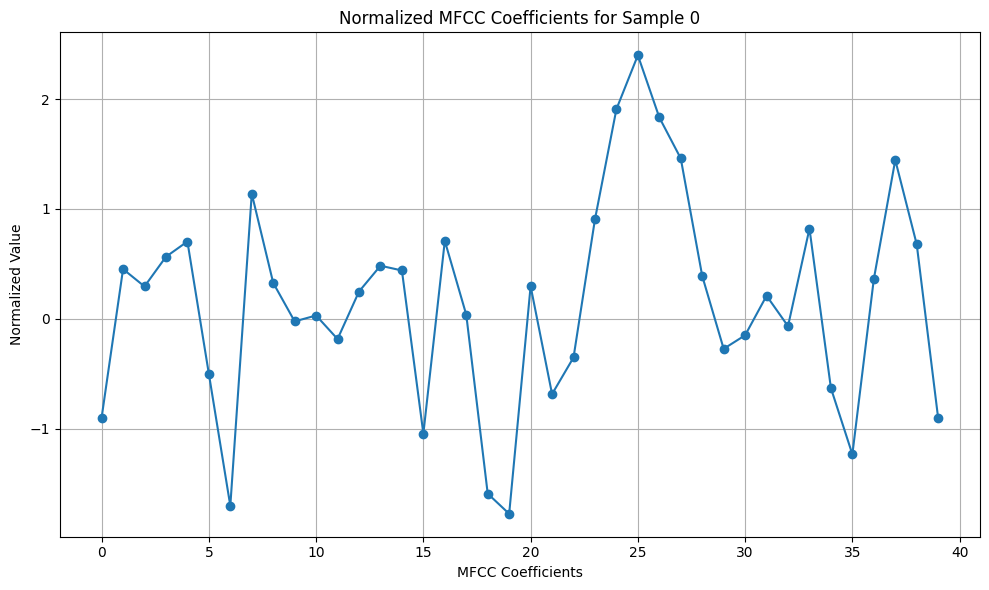

In [41]:
import matplotlib.pyplot as plt

# Choose a single sample (e.g., the first row)
sample_index = 0
single_sample_mfcc = mfcc_normalized[sample_index]

# Plot the MFCC coefficients
plt.figure(figsize=(10, 6))
plt.plot(single_sample_mfcc, marker='o')
plt.title(f'Normalized MFCC Coefficients for Sample {sample_index}')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Normalized Value')
plt.grid()
plt.tight_layout()
plt.show()


Visualize the Average MFCC Across All Samples

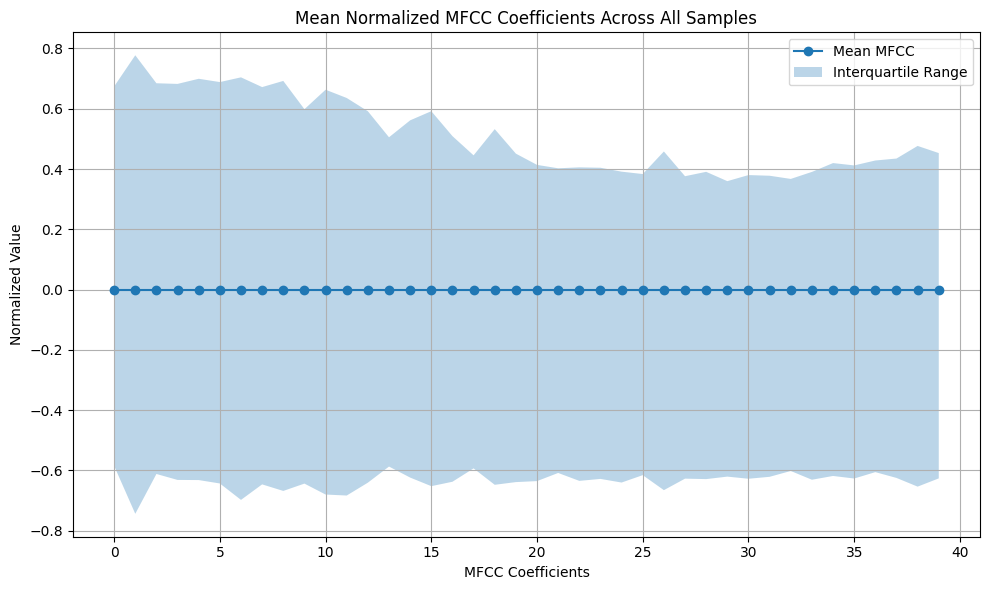

In [42]:
# Calculate the mean MFCC values across all samples
mean_mfcc = np.mean(mfcc_normalized, axis=0)

# Plot the average MFCC coefficients
plt.figure(figsize=(10, 6))
plt.plot(mean_mfcc, marker='o', label='Mean MFCC')
plt.fill_between(range(len(mean_mfcc)),
                 np.percentile(mfcc_normalized, 25, axis=0),
                 np.percentile(mfcc_normalized, 75, axis=0),
                 alpha=0.3, label='Interquartile Range')
plt.title('Mean Normalized MFCC Coefficients Across All Samples')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Visualize MFCC Distributions

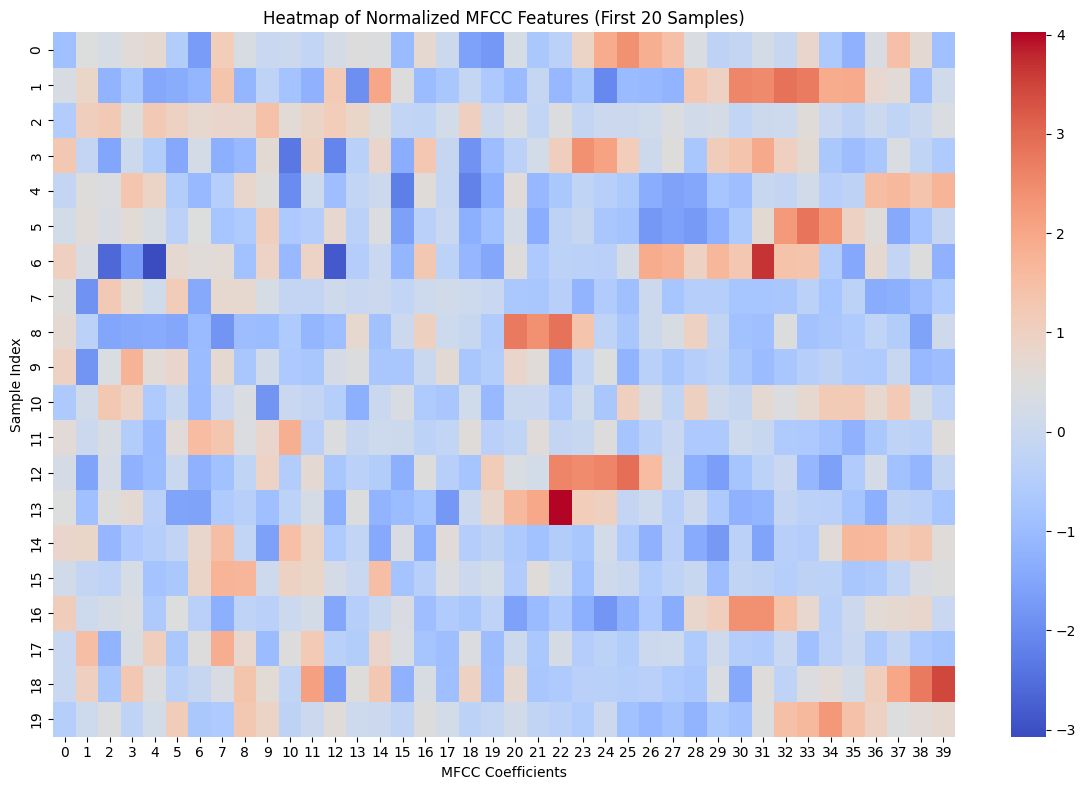

In [43]:
import seaborn as sns

# Create a heatmap for a subset of samples
plt.figure(figsize=(12, 8))
sns.heatmap(mfcc_normalized[:20], cmap='coolwarm', annot=False, cbar=True)
plt.title('Heatmap of Normalized MFCC Features (First 20 Samples)')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Sample Index')
plt.tight_layout()
plt.show()


In [44]:
print(len(df_combined))

12056


Creating Train and Test Set


In [45]:

# TRAIN TEST SPLIT DATA
from sklearn.model_selection import train_test_split
df_combined = pd.read_csv('ravdess_mfcc_features.csv')
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['Emotion']])
#TRAINING SET
X_train = train.iloc[:, 9:] #Considering only the features starts from 9th column
y_train = train.iloc[:,1] #Considering emotions as labels
print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)

#TESTING SET
X_test = test.iloc[:,9:]
y_test = test.iloc[:,1]
print(X_test.shape)
print(X_test)
print(y_test.shape)
print(y_test[1:10])

(9644, 40)
         MFCC_1    MFCC_2    MFCC_3    MFCC_4    MFCC_5    MFCC_6    MFCC_7  \
5426   0.577340 -0.602872 -2.073523 -2.350745 -2.923618 -0.391028  0.252198   
2590   0.755642 -0.248223 -0.368313  1.781035  1.861124 -0.577460 -2.189849   
2779   0.402402  1.120592  0.159603  0.364152  0.175765 -0.187335  0.992779   
3708   0.230186  0.553541 -0.304697  0.980591  2.264804  0.237715  0.103675   
9416   0.649759  0.766999 -0.265867 -1.209794 -0.031722  0.687245 -1.200834   
...         ...       ...       ...       ...       ...       ...       ...   
8568   0.560574  0.729554 -0.816014 -1.379628 -0.352761  0.348531 -1.273427   
2056  -0.152361  0.315934  1.108619  2.318906  2.099225  0.657805 -0.242450   
3704   0.254536  0.101203 -1.802193  0.614118 -0.501349 -1.917755  0.299224   
10993 -1.704073 -1.467911  0.613848  0.956810  0.487573  0.930781  0.398463   
6958   0.794002 -1.896207  0.232227  0.164465  0.240442  0.848473 -1.831468   

         MFCC_8    MFCC_9   MFCC_10  ...

Reshape for LSTM and Encoding

In [46]:
# ONE HOT ENCODE THE TARGET
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])
#Since,there are 8 different emotions; we get 8 columns.
#The places where 1 is present represents that particular emotion.
print(y_train.shape)
print(y_test.shape)





[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]
(9644, 8)
(2412, 8)


In [47]:
x_traincnnlstm =np.expand_dims(X_train, axis=2)
x_testcnnlstm= np.expand_dims(X_test, axis=2)
print(x_traincnnlstm.shape)
print(x_testcnnlstm.shape)

(9644, 40, 1)
(2412, 40, 1)


# Modelling

Model Prep


In [48]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, LSTM, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop
# Build the CNN-LSTM model
model = Sequential()

# CNN Layers
model.add(Conv1D(128, kernel_size=5, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-5),
                 input_shape=(x_traincnnlstm.shape[1], x_traincnnlstm.shape[2])))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(64, kernel_size=3, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM Layers
model.add(LSTM(128, return_sequences=True,
               kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(128, return_sequences=False,
               kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully Connected Layers
model.add(Dense(256, activation='relu',
                kernel_regularizer=regularizers.l2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
optimizer = RMSprop(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 36, 128)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 36, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 18, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 18, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 16, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 8, 128)              │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 292,680 (1.12 MB)

 Trainable params: 291,784 (1.11 MB)

 Non-trainable params: 896 (3.50 KB)

Train the CNN-LSTM Model

In [49]:
history = model.fit(
    x_traincnnlstm,  # Training features
    y_train,         # Training labels
    batch_size=250,  # Batch size for training
    epochs=1000,      # Number of epochs
    validation_data=(x_testcnnlstm, y_test),  # Validation data
)


Epoch 1/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.1268 - loss: 2.5536 - val_accuracy: 0.1248 - val_loss: 2.0839
Epoch 2/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1533 - loss: 2.3677 - val_accuracy: 0.1526 - val_loss: 2.0867
Epoch 3/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1521 - loss: 2.2960 - val_accuracy: 0.1277 - val_loss: 2.0964
Epoch 4/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1594 - loss: 2.2762 - val_accuracy: 0.1273 - val_loss: 2.1039
Epoch 5/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1659 - loss: 2.2307 - val_accuracy: 0.1356 - val_loss: 2.1082
Epoch 6/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1671 - loss: 2.2081 - val_accuracy: 0.1459 - val_loss: 2.1148
Epoch 7/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.1825 - loss: 2.1713 - val_accuracy: 0.1522 - val_loss: 2.1160
Epoch 8/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1904 - loss: 2.1571 - val_accu

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7669 - loss: 0.9785
Test Accuracy: 0.7546


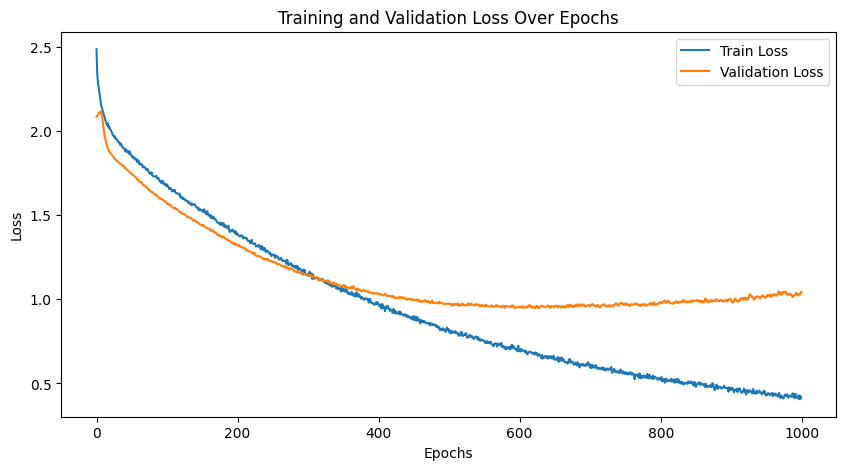

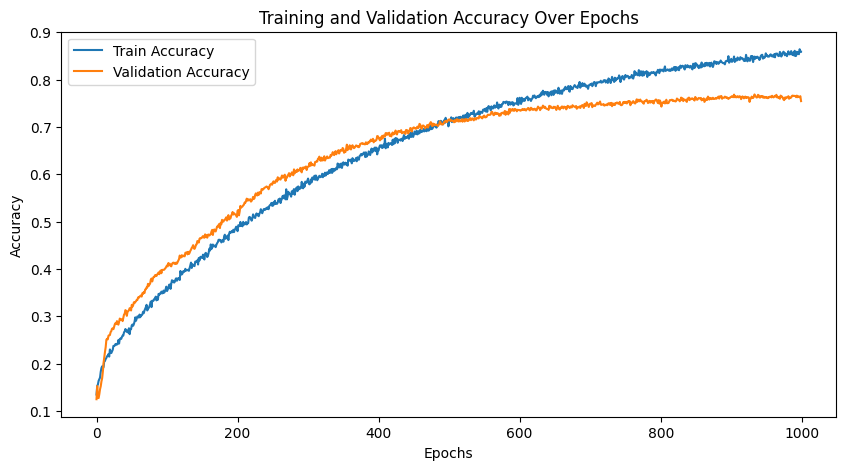

In [50]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_testcnnlstm, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plotting Training and Validation Metrics
def plot_training_history(history):
    # Plot Loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

    # Plot Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy Over Epochs')
    plt.legend()
    plt.show()

# Call the plotting function
plot_training_history(history)

In [51]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(x_testcnnlstm)

# Get the class labels
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

# Compute overall metrics for the model
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted')
recall = recall_score(y_test_class, y_pred_class, average='weighted')
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

print("\nOverall Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1-Score (Weighted): {f1:.2f}")

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.52      0.59       302
           1       0.82      0.86      0.84       301
           2       0.71      0.74      0.72       301
           3       0.74      0.74      0.74       302
           4       0.75      0.69      0.72       302
           5       0.82      0.94      0.88       302
           6       0.77      0.72      0.75       301
           7       0.72      0.82      0.77       301

    accuracy                           0.75      2412
   macro avg       0.75      0.75      0.75      2412
weighted avg       0.75      0.75      0.75      2412


Overall Metrics:
Accuracy: 0.75
Precision (Weighted): 0.75
Recall (Weighted): 0.75
F1-Score (Weighted): 0.75


Normalized Confusion Matrix (Accuracy per Class):
[[0.52317881 0.02980132 0.10264901 0.08940397 0.0794702  0.01324503
  0.04635762 0.11589404]
 [0.00332226 0.85714286 0.01328904 0.00996678 0.         0.04983389
  0.04318937 0.02325581]
 [0.05980066 0.01993355 0.73754153 0.02657807 0.05315615 0.02657807
  0.01993355 0.05647841]
 [0.05960265 0.01324503 0.02317881 0.74172185 0.04635762 0.01986755
  0.03642384 0.05960265]
 [0.07284768 0.01986755 0.04966887 0.07284768 0.68874172 0.03311258
  0.03642384 0.02649007]
 [0.         0.01986755 0.02649007 0.         0.00662252 0.94039735
  0.00662252 0.        ]
 [0.01328904 0.0730897  0.04983389 0.03322259 0.02657807 0.04318937
  0.72425249 0.03654485]
 [0.02990033 0.00664452 0.03654485 0.03322259 0.02325581 0.02325581
  0.02325581 0.82392027]]


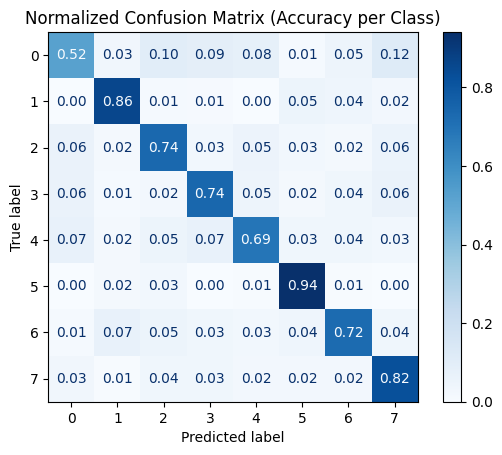

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Normalize the confusion matrix by row (true label) to calculate accuracy per class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the normalized confusion matrix
print("Normalized Confusion Matrix (Accuracy per Class):")
print(cm_normalized)

# Visualize the normalized confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=range(len(np.unique(y_test_class))))
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Normalized Confusion Matrix (Accuracy per Class)")
plt.show()
